# Проект: Приоритизация гипотез и анализ А/В-теста

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
pd.set_option('display.max_colwidth', 150)

## Часть 1 Приоритезация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина. Необходимо их приоритизировать.

In [2]:
# загружаем файл с данными
try:
    hypothesis = pd.read_csv("hypothesis.csv")
except:
    hypothesis = pd.read_csv("/datasets/hypothesis.csv")

In [3]:
# посмотрим на данные поближе
def info(data):
    data.info()
    print('*'*50)
    display(data.describe())
    print('*'*50)
    display(data)

info(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
**************************************************


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


**************************************************


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Таблица имеет следующие колонки:
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные без пропусков. Все типы соответствуют данным. Приступим к приоритизации.

### Фреймворк ICE для приоритизации

In [4]:
# расcчитаем ICE
hypothesis['ICE'] = round((hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts'])
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


Наиболее приоритетными являются гипотезы:
1. 8-Запустить акцию, дающую скидку на товар, 
2. 0-Добавить два новых канала привлечения трафика, 
3. 7-Добавить форму подписки на все основные страницы.

### Фреймворк RICE для приоритизации

In [5]:
# расcчитаем RICE
hypothesis['RICE'] = round((hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts'])
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод:

In [6]:
display(hypothesis[['Hypothesis', 'ICE', 'RICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0,16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0,4.0


Проведя приоритизацию с помощью двух фрейворков видим что порядок приоритетности гипотез меняется. Параметр `Reach` отвечающий за оценку того как много пользователей затронет гипотеза существенно влияет на приоритет. Если при применении фреймворка `ICE` 7я гипотеза была лишь третьей в списке, то за счет оценки `Reach` в **10** баллов при применении фреймворка `RICE` она поднялась на первое место, в то всремя как лидер фреймворка `ICE` 8-Запустить акцию, дающую скидку на товар, опустился аж на пятую позицию при применении `RICE`.

## Часть 2 Анализ А/В-теста

**Задача:** проанализировать ранее проведенный А/В-тест. Результаты описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

In [7]:
# загружаем файлы с данными
try:
    orders = pd.read_csv("orders.csv")
    visitors = pd.read_csv("visitors.csv")
except:
    orders = pd.read_csv("/datasets/orders.csv")
    visitors = pd.read_csv("/datasets/visitors.csv")

In [8]:
# посмотрим на данные поближе
info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
**************************************************


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


**************************************************


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Датасет содержит колонки:
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Данные без пропусков. Тип данных в столбце `date` не соответствует формату времени.

In [9]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [10]:
info(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
**************************************************


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


**************************************************


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


В таблице три столбца:
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

Данные без пропусков. Тип данных в столбце `date` не соответствует формату времени. Количество посетителей от 62 до 770.

In [11]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [12]:
visitor_group = orders[['visitorId','group']].drop_duplicates().sort_values(by=['visitorId','group']).reset_index(drop=True)
display(visitor_group['visitorId'].value_counts().head(60))

4266935830    2
237748145     2
3766097110    2
3234906277    2
3891541246    2
199603092     2
1294878855    2
2712142231    2
3202540741    2
3803269165    2
3984495233    2
2600415354    2
818047933     2
963407295     2
2780786433    2
232979603     2
4120364173    2
3941795274    2
2038680547    2
1648269707    2
8300375       2
2716752286    2
3957174400    2
457167155     2
477780734     2
393266494     2
3972127743    2
1614305549    2
2044997962    2
3951559397    2
2458001652    2
1668030113    2
2654030115    2
2949041841    2
1959144690    2
2579882178    2
3062433592    2
4186807279    2
1230306981    2
1316129916    2
4256040402    2
4069496402    2
3656415546    2
2686716486    2
2587333274    2
1404934699    2
1738359350    2
2927087541    2
276558944     2
3963646447    2
1333886533    2
1801183820    2
351125977     2
2954449915    2
471551937     2
2378935119    2
1602967004    2
3717692402    2
721509856     1
3102053760    1
Name: visitorId, dtype: int64

### График кумулятивной выручки по группам

Для начала чтобы построить графики, нужно собрать кумулятивные данные.

In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

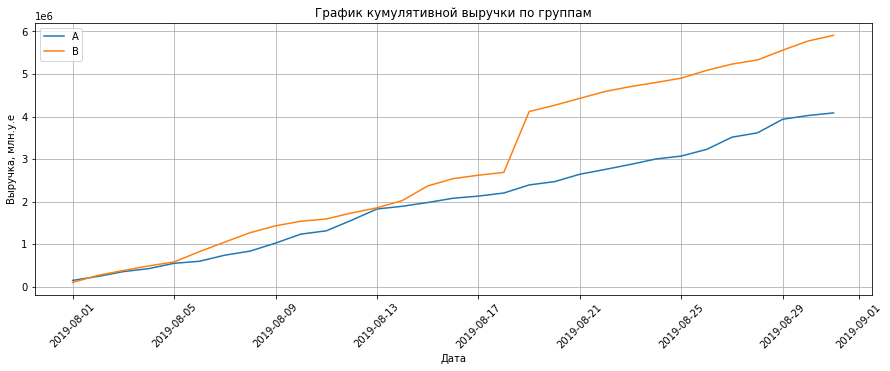

In [14]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка, млн.у.е')
plt.xlabel('Дата')
plt.grid()
plt.xticks(rotation=45)
plt.legend();

Выручка увеличивается в течение всего теста. **13** августа выручки примерно равны.
Однако далее график выручки группы В в одном месте - **19** августа резко растет. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Без них можно предположить что выручки росли примерно одинаково.

Посмотрим были ли какие-то выбивающиеся из общего числа заказы 19 агуста

In [15]:
print('Медианное значение одного заказа 19 августа =',orders.query(' date == "2019-08-19" ')['revenue'].median())
orders.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(10)

Медианное значение одного заказа 19 августа = 2630.0


,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
525,3031564664,393266494,2019-08-19,21550,A
368,3268879337,2536252163,2019-08-19,20026,B
366,2037051350,1957949546,2019-08-19,16770,A
463,4170537404,290022471,2019-08-19,16480,B
531,4016435970,4017075195,2019-08-19,13390,A


Заказ **№425** - **1.294.500у.е.** явно больше чем все последующие и в **492** больше медианного значения за этот день! Он находится в `группе В` и скорее всего является выбросом.

### График кумулятивного среднего чека по группам

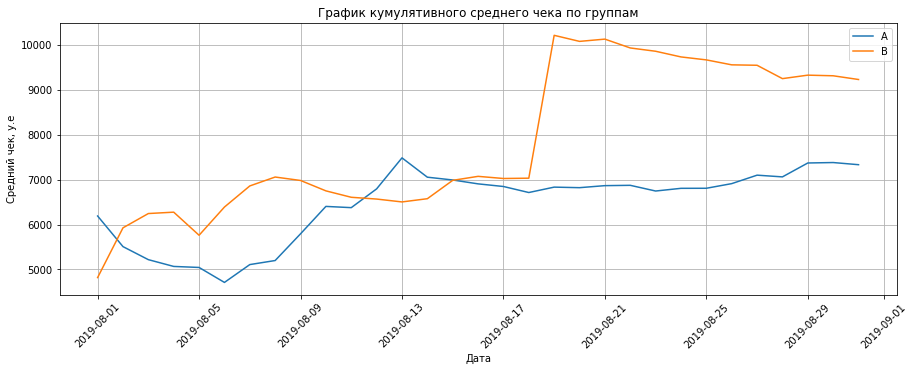

In [16]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек, у.е')
plt.xlabel('Дата')
plt.grid()
plt.xticks(rotation=45)
plt.legend();

В первой половине в `группе В` чек преимущественно больше, но есть даты где наоборот чек в `группе А` больше - **1, 12, 13, 14** августа. Далее чек `группы В` стабильно больше. На этом графиkе как и в случае графика кумулятивной выручки видно сильное влияние аномально большого заказа **№425**. После **19** августа средний чек `группы В` постепенно снижается, а средний чек `группы А` очень медленно растет.

### График относительного изменения кумулятивного среднего чека группы В к группе А

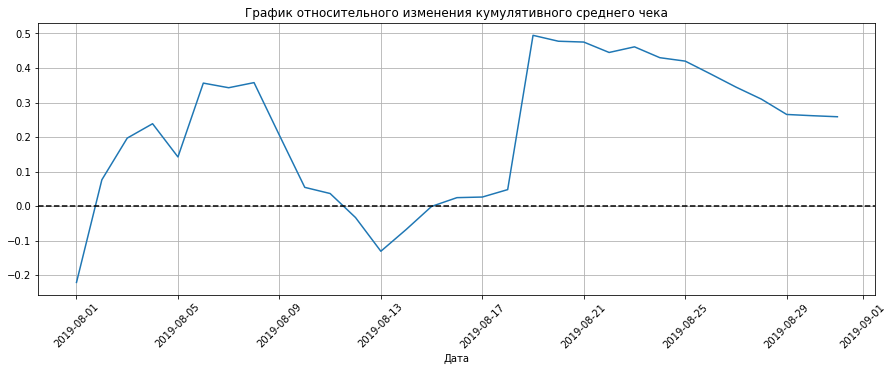

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.grid()
plt.show();

В нескольких точках график различия между сегментами резко «скачет». Есть выбросы и крупные заказы. Хорошо виден сильный всплеск(рост) за счет заказа **№425**.

### График кумулятивной конверсии по группам

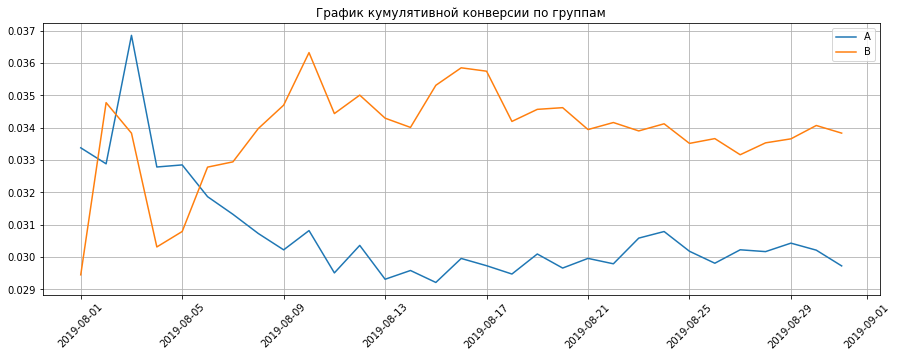

In [18]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.xticks(rotation=45)
plt.grid();

С начала месяца конверсия `группы А` была выше чем `группы В`. **3** августа `группа А` показала максимальную конверсию за весь период наблюдения. А после пика пошла стремительно падать и начиная с 06 августа конверсия `группы В` постоянно выше. 

### График относительного изменения кумулятивной конверсии группы В к группе А

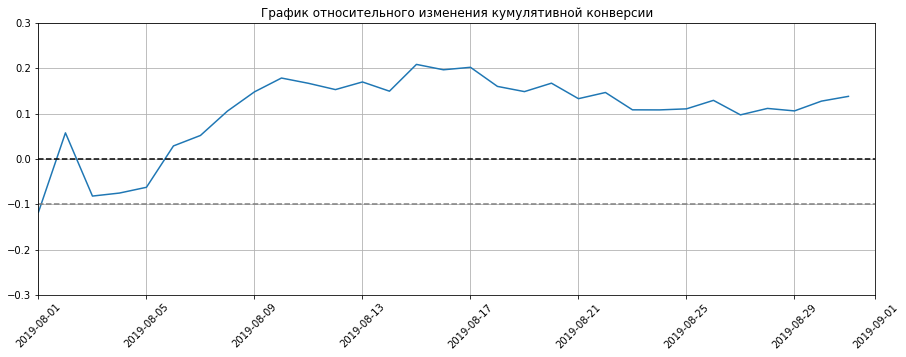

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строим график
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивной конверсии')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.3, 0.3]) 
plt.xticks(rotation=45)
plt.grid()
plt.show();

Начиная с **06** августа `группа В` лидировала до конца периода. 

### Точечный график количества заказов по пользователям и 95, 99 перцентили

In [20]:
# подсчет количества заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

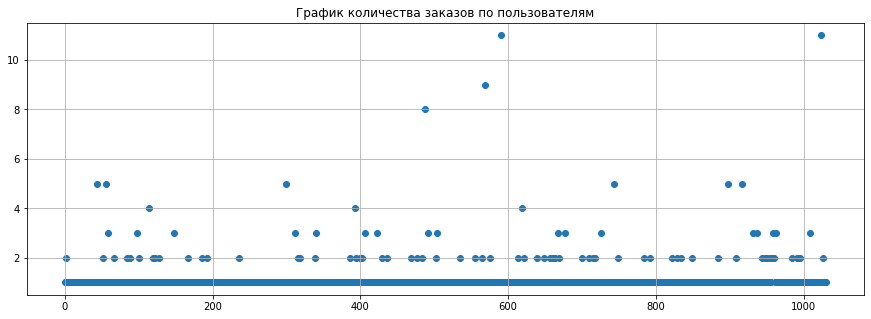

In [21]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График количества заказов по пользователям');

Большинство покупателей заказывали только один раз. Однако доля пользователей с **2** заказами тоже значительна. Чтобы понять считать ли выбросами случаи от трех заказов надо посчитать перценитили (**95** и **99**)

In [22]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более **5%** оформляли **2** заказа и не более **1% - 4**. Примем **2** заказа на одного пользователя за нижнюю границу числа заказов, и отсеем аномальных пользователей по ней. 

In [23]:
order_limit = 2

### Точечный график стоимостей заказов и 95,  99 перцентили

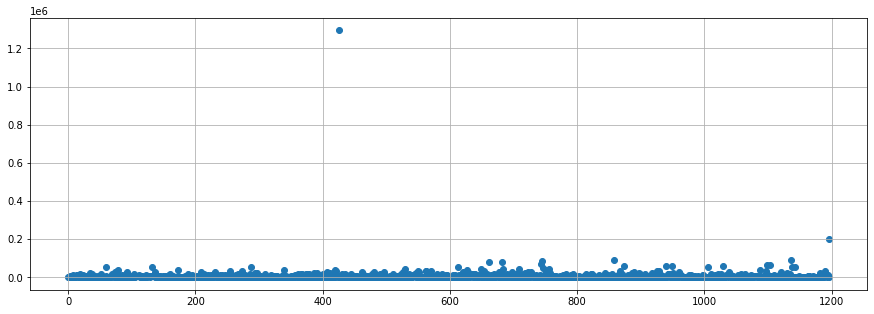

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(x_values, orders['revenue']); 

Есть несколько дорогих заказов, чтобы отсеять аномалии посмотрим на **95** и **99** перцентили выборки.

In [25]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более **5%** заказов дороже **28000 y.e.** и не более 1% дороже **58233 y.e.**. Возьмем за нижнюю границу заказы дороже **58000 у.е.**

In [26]:
revenue_limit = 58000

### Статистическая значимость различий в конверсии между группами по "сырым" данным

Сформулируем гипотезы. **Нулевая:** различий в конверсии между группами нет. **Альтернативная:** различия в конверсии между группами есть.

Начнём с подготовки данных.

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создали датафрейм с такими колонками:
- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные `ordersByUsersA` и `ordersByUsers`, в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [28]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

Выведем относительный прирост конверсии `группы B`. Округлим до трёх знаков после запятой.

In [29]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

0.017
0.138


Первое число — p-value = **0.017** меньше **0.05**. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем. Относительный выигрыш группы B равен **13.8%** — второе число в выводе.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами.

### Статистическая значимость различий в среднем чеке заказа между группами по "сырым" данным

**Нулевая гипотеза:** различий в среднем чеке между группами нет. **Альтернативная гипотеза:** различия в среднем чеке между группами есть.

In [30]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


P-value значительно больше **0.05**. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Но при этом средний чек `группы B` значительно выше среднего чека `группы A` (приблизительно на **26%**).

### Статистическая значимость различий в конверсии между группами по "очищенным" данным

Примем за аномальных пользователей тех, кто совершил больше **2** заказов или совершил заказ дороже **58 000 у.е.**. Сделаем срезы пользователей и узнаем количество аномальных.

In [31]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > order_limit]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > order_limit]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_limit]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
(31,)


**31** аномальный пользователь. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сформулируем гипотезы. **Нулевая гипотеза:** различий в конверсии между группами нет. **Альтернативная гипотеза:** различия в конверсии между группами есть.

In [32]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.010
0.174


Результаты по конверсии практически не изменились. Нулевую гипотезу отвергаем. Относительный выигрыш `группы В` над `группой А` равен **17,4%**(по "сырым" данным - **13,8%**) 

### Статистическая значимость различий в среднем чеке заказа между группами по "очищенным" данным

**Нулевая гипотеза:** различий в среднем чеке между группами нет. **Альтернативная гипотеза:** различия в среднем чеке между группами есть.

In [33]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.798
-0.020


P-value значительно увеличился и теперь можно говорить о том что нулевую гипотезу о равности средних чеков мы отвергнуть не можем. Средний чек `группы В` стал ниже среднего чека `группы А` на **2%**, в то время как по "сырым" данным он был аж на **26%** больше.

### Вывод по результатам теста

**Анализ результатов теста:**
- Есть статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий; Относительный выигрыш `группы В` над `группой А` по "сырым" данным - **13,8%**, по "очищенным" - **17,4%**.
- И по "сырым" и по "очищенным" данным различия в средних чеках `групп А` и `В` отстуствуют, но при этом по "очищенным" данным средний чек группы В оказался незначительно(**2%**) ниже среднего чека `группы А`, в то время как по "сырым" данным был больше аж на **26%**. Повлиял аномально крупный чек почти на **1,3млн.у.е.**

**Решение:**
В итоге можно остановить тестирование и констатировать успех `группы В`. Она значительно эффективнее `группы А` по конверсии, хотя средние чеки приблизительно равны.